<a href="https://colab.research.google.com/github/A-stell-A/weatherwise-template/blob/main/Weatherwise_Completed_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================================
# 🌦️ Interactive Weather App (Python CLI Tool)
# ===============================================
# A Python command-line weather application that fetches and displays
# current weather conditions, short-term forecasts, and plots for
# temperature trends and precipitation probability using OpenWeatherMap API.
# ===============================================


In [ ]:
!pip install pyinputplus

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11349 sha256=5c6ad2b051675e1886cf500d708dc31e51fca651d9c76eca83ffc8bf2de5de15
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16224 sha256=74a84d5a1a7686a33eef2531755dfb611064de274e30fb44f3266f1cbe7d2496
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask

Enter a city name (e.g., Perth,AU): Sydney, AU

Weather data for Sydney, AU loaded successfully.

What would you like to view?
1. Current Conditions
2. Forecast
3. Temperature Plot
4. Precipitation Plot
5. Change City
6. Exit
1

--- Current Weather Conditions ---
City: Sydney
Temperature: 13.6°C
Condition: moderate rain
Humidity: 87%
Wind Speed: 11.04 m/s

What would you like to view?
1. Current Conditions
2. Forecast
3. Temperature Plot
4. Precipitation Plot
5. Change City
6. Exit
4


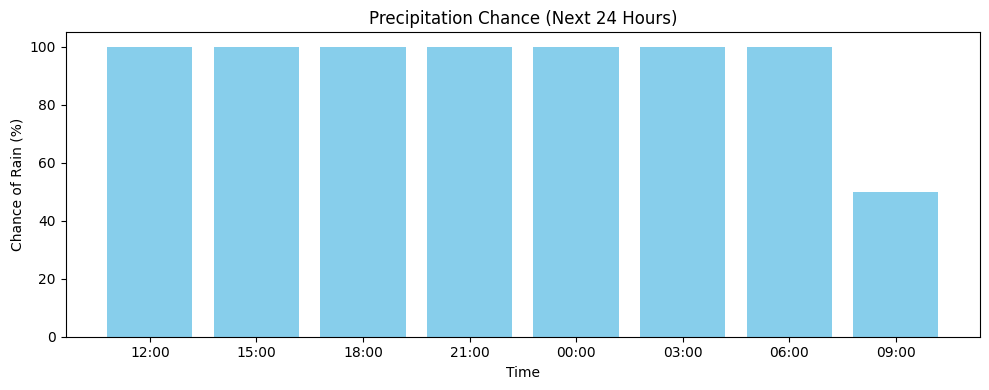


What would you like to view?
1. Current Conditions
2. Forecast
3. Temperature Plot
4. Precipitation Plot
5. Change City
6. Exit


KeyboardInterrupt: Interrupted by user

In [ ]:
# ===============================
# 📦 Imports and API Key Setup
# ===============================

import requests
import matplotlib.pyplot as plt
from datetime import datetime
import pyinputplus as pyip

API_KEY = "9e58001aecb184f42bbfe60f3ce9751e"  # OpenWeatherMap API Key


# ===============================
# 🌤️ Weather Data Retrieval
# ===============================

def get_weather_data(city):
    """
    Fetch weather forecast data for the specified city from OpenWeatherMap API.

    Args:
        city (str): Name of the city (e.g., "London,UK")

    Returns:
        dict: JSON response containing weather data
    """
    url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    return response.json()


# ===============================
# 📋 Display Current Conditions
# ===============================

def display_current_conditions(data):
    """
    Display current weather conditions from the API data.

    Args:
        data (dict): Weather data returned from OpenWeatherMap API
    """
    print("\n--- Current Weather Conditions ---")
    current = data['list'][0]
    city = data['city']['name']
    temp = current['main']['temp']
    condition = current['weather'][0]['description']
    humidity = current['main']['humidity']
    wind_speed = current['wind']['speed']

    print(f"City: {city}")
    print(f"Temperature: {temp}°C")
    print(f"Condition: {condition}")
    print(f"Humidity: {humidity}%")
    print(f"Wind Speed: {wind_speed} m/s")


# ===============================
# 📆 Display Forecast Summary
# ===============================

def display_forecast(data):
    """
    Display a short-term forecast for the next few hours.

    Args:
        data (dict): Weather data returned from OpenWeatherMap API
    """
    print("\n--- Forecast (Next 5 Entries ~ 15 hours) ---")
    for entry in data['list'][:5]:
        time = datetime.fromtimestamp(entry['dt']).strftime('%Y-%m-%d %H:%M')
        temp = entry['main']['temp']
        desc = entry['weather'][0]['description']
        print(f"{time} | {temp}°C | {desc}")


# ===============================
# 📈 Plot Temperature Trend
# ===============================

def plot_temperature_trend(data):
    """
    Plot a line graph showing temperature changes over the next 24 hours.

    Args:
        data (dict): Weather data returned from OpenWeatherMap API
    """
    times = [datetime.fromtimestamp(entry['dt']).strftime('%H:%M') for entry in data['list'][:8]]
    temps = [entry['main']['temp'] for entry in data['list'][:8]]

    plt.figure(figsize=(10, 4))
    plt.plot(times, temps, marker='o', color='orange')
    plt.title("Temperature Trend (Next 24 Hours)")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ===============================
# 🌧️ Plot Precipitation Chance
# ===============================

def plot_precipitation_chance(data):
    """
    Plot a bar chart showing the probability of precipitation over the next 24 hours.

    Args:
        data (dict): Weather data returned from OpenWeatherMap API
    """
    times = [datetime.fromtimestamp(entry['dt']).strftime('%H:%M') for entry in data['list'][:8]]
    pops = [entry.get('pop', 0) * 100 for entry in data['list'][:8]]  # pop = probability of precipitation

    plt.figure(figsize=(10, 4))
    plt.bar(times, pops, color='skyblue')
    plt.title("Precipitation Chance (Next 24 Hours)")
    plt.xlabel("Time")
    plt.ylabel("Chance of Rain (%)")
    plt.tight_layout()
    plt.show()


# ===============================
# 🧭 Main Program with Menu
# ===============================

# Prompt user for initial city
city = input("Enter a city name (e.g., Perth,AU): ")
weather_data = get_weather_data(city)

# Validate response
if weather_data.get('cod') != '200':
    print(f"Error: {weather_data.get('message')}")
else:
    print(f"\nWeather data for {city} loaded successfully.")

    # Start interactive menu loop
    while True:
        choice = pyip.inputMenu(
            ['Current Conditions', 'Forecast', 'Temperature Plot', 'Precipitation Plot', 'Change City', 'Exit'],
            numbered=True,
            prompt="\nWhat would you like to view?\n"
        )

        if choice == 'Current Conditions':
            display_current_conditions(weather_data)
        elif choice == 'Forecast':
            display_forecast(weather_data)
        elif choice == 'Temperature Plot':
            plot_temperature_trend(weather_data)
        elif choice == 'Precipitation Plot':
            plot_precipitation_chance(weather_data)
        elif choice == 'Change City':
            city = input("\nEnter a new city name (e.g., Tokyo,JP): ")
            weather_data = get_weather_data(city)
            if weather_data.get('cod') != '200':
                print(f"Error: {weather_data.get('message')}")
            else:
                print(f"\nWeather data for {city} updated.")
        elif choice == 'Exit':
            print("Goodbye!")
            break


In [ ]:
# %%
# ===============================================
# 🌦️ Interactive Weather Assistant (CLI Tool)
# ===============================================
# A Python program that answers user weather questions or provides weather
# data for specified cities using the OpenWeatherMap API.
# ===============================================

# %%
# 📦 Imports and API Key Setup

import requests
import matplotlib.pyplot as plt
from datetime import datetime
import re
import pyinputplus as pyip

# Replace with your OpenWeatherMap API key
API_KEY = "9e58001aecb184f42bbfe60f3ce9751e"

# %%
# 🌐 Weather Data Retrieval

def get_weather_data(city):
    """
    Retrieve weather forecast data from OpenWeatherMap API.

    Args:
        city (str): City name (e.g., "London,UK").

    Returns:
        dict: Weather data in JSON format.
    """
    url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    return response.json()

# %%
# ☔ Rain Check Logic

def check_for_rain_today(data):
    """
    Check if it is likely to rain today based on forecast data.

    Args:
        data (dict): Weather forecast data.

    Returns:
        bool: True if rain probability > 50% in the next 24 hours, else False.
    """
    for entry in data['list'][:8]:
        if entry.get('pop', 0) > 0.5:
            return True
    return False

# %%
# 🏙️ Extract City from Question

def get_city_from_question(question):
    """
    Extract the city name from a user's natural language question.

    Args:
        question (str): A question containing a city (e.g., "Will it rain in Paris?").

    Returns:
        str or None: Extracted city name, or None if not found.
    """
    match = re.search(r"in ([A-Za-z\s,]+)", question)
    if match:
        return match.group(1).strip()
    return None

# %%
# 💬 Natural Language Question Handler

def process_weather_question(question):
    """
    Process a user's natural language weather question.

    Args:
        question (str): The weather-related question.
    """
    city = get_city_from_question(question)
    if not city:
        print("❌ Could not detect the city in your question.")
        return

    print(f"\n📍 Getting weather for: {city}")
    weather_data = get_weather_data(city)
    if weather_data.get('cod') != '200':
        print(f"Error: {weather_data.get('message')}")
        return

    # Respond based on question content
    if "umbrella" in question.lower() or "rain" in question.lower():
        if check_for_rain_today(weather_data):
            print("🌧️ Yes, you should bring an umbrella today.")
        else:
            print("☀️ No umbrella needed — it doesn't look like it'll rain.")
    elif "temperature" in question.lower() or "hot" in question.lower():
        display_current_conditions(weather_data)
    else:
        display_forecast(weather_data)

# %%
# 🌡️ Current Weather Conditions

def display_current_conditions(data):
    """
    Display the current weather information.

    Args:
        data (dict): Weather forecast data.
    """
    print("\n--- Current Weather Conditions ---")
    current = data['list'][0]
    city = data['city']['name']
    temp = current['main']['temp']
    condition = current['weather'][0]['description']
    humidity = current['main']['humidity']
    wind_speed = current['wind']['speed']

    print(f"City: {city}")
    print(f"Temperature: {temp}°C")
    print(f"Condition: {condition}")
    print(f"Humidity: {humidity}%")
    print(f"Wind Speed: {wind_speed} m/s")

# %%
# 🗓️ Short-Term Forecast Summary

def display_forecast(data):
    """
    Display the weather forecast for the next 5 time intervals (~15 hours).

    Args:
        data (dict): Weather forecast data.
    """
    print("\n--- Forecast (Next 5 Entries ~ 15 hours) ---")
    for entry in data['list'][:5]:
        time = datetime.fromtimestamp(entry['dt']).strftime('%Y-%m-%d %H:%M')
        temp = entry['main']['temp']
        desc = entry['weather'][0]['description']
        print(f"{time} | {temp}°C | {desc}")

# %%
# 🛠️ Manual City Weather Lookup

def manual_city_weather():
    """
    Ask user to enter a city name manually and display weather info.
    """
    city = input("\nEnter a city name (e.g., Tokyo,JP): ")
    weather_data = get_weather_data(city)
    if weather_data.get('cod') != '200':
        print(f"Error: {weather_data.get('message')}")
        return
    display_current_conditions(weather_data)
    display_forecast(weather_data)

# %%
# 🧭 Main Program Loop

print("🌤️ Welcome to the Weather Assistant!")

while True:
    menu_choice = pyip.inputMenu(
        ['Ask a weather question', 'Manually enter a city', 'Exit'],
        numbered=True,
        prompt="\nWhat would you like to do?\n"
    )

    if menu_choice == 'Ask a weather question':
        question = input("\n❓ Your question: ")
        process_weather_question(question)

    elif menu_choice == 'Manually enter a city':
        manual_city_weather()

    elif menu_choice == 'Exit':
        print("👋 Goodbye!")
        break
